In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

# import all csv's
file1 = "all_state_violent_crimes.csv"
file2 = "Opioid Stats.csv"
file3 = "nibrs_incident.csv"

# read csv's and assign
crime_data = pd.read_csv(file1)
opioid_data = pd.read_csv(file2)
incident_data = pd.read_csv(file3)



In [2]:
# Clean csv = crime_data and reduce to select states

# Cleaning the headers of the DataFrame to more user friendly information
crime_data = crime_data.rename(columns={"year":"Year","state_id":"State ID","state_abbr":"State Abbreviation","state_name":"State Name","population":"Population","violent_crime":"Violent Crime","homicide":"Homicide","rape_legacy":"Rape Legacy","rape_revised":"Rape Revised","robbery":"Robbery","aggravated_assault":"Aggravated Assault","property_crime":"Property Crime","burglary":"Burglary","larceny":"Larceny","motor_vehicle_theft":"Motor Vehicle Theft"})

# Cleaning crime_data dataframe - eliminating columns not needed.
crime_data = pd.DataFrame(crime_data, columns = ["Year","State Name","Population","Violent Crime","Homicide", "Rape Legacy","Rape Revised","Robbery", "Aggravated Assault","Property Crime", "Burglary", "Larceny", "Motor Vehicle Theft"])

# (long way) Pulling only select states needed for our study
crime_data_wash = crime_data[crime_data['State Name'] == "Washington"]
crime_data_ari = crime_data[crime_data['State Name'] == "Arizona"]
crime_data_flor = crime_data[crime_data['State Name'] == "Florida"]
crime_data_col = crime_data[crime_data['State Name'] == 'Colorado']

targetyears = ["2010","2011","2012","2013","2014","2015","2016","2017"]
crime_wash = crime_data_wash.loc[(crime_data_wash["Year"].isin(targetyears)),:]
crime_ari = crime_data_ari.loc[(crime_data_ari["Year"].isin(targetyears)),:]
crime_flor = crime_data_flor.loc[(crime_data_flor["Year"].isin(targetyears)),:]
crime_col = crime_data_col.loc[(crime_data_col["Year"].isin(targetyears)),:]

# compiling the DFs created above
frames = [crime_ari, crime_col, crime_flor, crime_wash]

# Concatenate frames into one DataFrame for use.
state_violent_crime = pd.concat(frames)

# view data.
state_violent_crime

,Year,State Name,Population,Violent Crime,Homicide,Rape Legacy,Rape Revised,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft
107,2010,Arizona,6413158,26528,408,2191,NaN,6953,16976,226802,50932,154137,21733
108,2011,Arizona,6467315,26789,397,2499,NaN,7145,16748,229896,54695,155400,19801
109,2012,Arizona,6551149,28077,358,2282,NaN,7383,18054,231701,52911,159808,18982
110,2013,Arizona,6634997,27576,355,2344,3174.0,6656,17391,223294,48292,158036,16966
111,2014,Arizona,6728783,26422,311,2356,3272.0,6225,16614,213406,43412,152683,17311
112,2015,Arizona,6817565,27968,306,2268,3109.0,6360,18193,207184,38010,152388,16786
113,2016,Arizona,6908642,32542,389,3290,3304.0,7045,21804,207317,38216,150618,18483
114,2017,Arizona,7016270,35644,416,0,3581.0,7440,24207,204515,37627,147830,19058
153,2010,Colorado,5047692,16339,129,2230,NaN,3164,10816,135001,26196,97534,11271
154,2011,Colorado,5116302,16085,155,2285,NaN,3299,10346,132781,25725,96054,11002


In [3]:
# Pulling other states for non-legal comparison
no_mj_states=["Idaho","Wyoming","South Dakota","Nebraska", "Texas", "Kansas", "Iowa","Wisconsin","Indiana","Kentucky","Tennessee","Virginia","North Carolina","South Carolina","Georgia", "Alabama","Mississippi"]
non_mj = crime_data.loc[(crime_data["State Name"].isin(no_mj_states)),:]



In [4]:
non_mj['Rape Revised'].fillna(0, inplace=True)
non_mj['Rape'] = non_mj['Rape Legacy'] + non_mj['Rape Revised']
non_mj = non_mj.drop(columns="Rape Legacy")
non_mj = non_mj.drop(columns="Rape Revised")


/Users/ahardy94/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/ahardy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
targetyears = ["2010","2011","2012","2013","2014","2015","2016","2017"]
non_mj = non_mj.loc[(non_mj["Year"].isin(targetyears)),:]
non_mj.head()

,Year,State Name,Population,Violent Crime,Homicide,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape
61,2010,Alabama,4785401,18363,275,4864,11869,168828,42484,115564,10780,1355.0
62,2011,Alabama,4803689,20166,299,4906,13591,173192,51119,111411,10662,1370.0
63,2012,Alabama,4817528,21693,342,5020,15035,168878,47481,111523,9874,1296.0
64,2013,Alabama,4833996,20834,346,4645,13788,161835,42410,108862,10563,3504.0
65,2014,Alabama,4846411,20727,276,4702,13744,154087,39723,104223,10141,3430.0


In [6]:
non_mj_groupby = non_mj.groupby('Year')
non_mj_sums = non_mj_groupby.sum()
non_mj_sums = non_mj_sums.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')


In [7]:
state_violent_crime['Rape Revised'].fillna(0, inplace=True)
state_violent_crime['Rape'] = state_violent_crime['Rape Legacy'] + state_violent_crime['Rape Revised']
state_crime = state_violent_crime.drop(columns="Rape Legacy")
state_crime = state_violent_crime.drop(columns="Rape Revised")

In [8]:
# drop NaN values precaution
state_crime.dropna(how='any')
# view clean data
state_crime.head()


,Year,State Name,Population,Violent Crime,Homicide,Rape Legacy,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape
107,2010,Arizona,6413158,26528,408,2191,6953,16976,226802,50932,154137,21733,2191.0
108,2011,Arizona,6467315,26789,397,2499,7145,16748,229896,54695,155400,19801,2499.0
109,2012,Arizona,6551149,28077,358,2282,7383,18054,231701,52911,159808,18982,2282.0
110,2013,Arizona,6634997,27576,355,2344,6656,17391,223294,48292,158036,16966,5518.0
111,2014,Arizona,6728783,26422,311,2356,6225,16614,213406,43412,152683,17311,5628.0


In [9]:
# Dates for legalization in marijuana
# recreational rounded year
colorado_rec = "2013"
washington_rec = "2013"

# medicinal marijuana legalization date - month/year
arizona_med = "2010"
colorado_med = "2001"
florida_med = "2017"
washington_med = "1999"

In [10]:






## All of the summations of all reported crime incidents by states. The non-marijuana legal states have been summed 

# together for a easy and seemless picture of the overall trend. The section succeeding this will be YOY growth rate

# comparisons between the subjects.







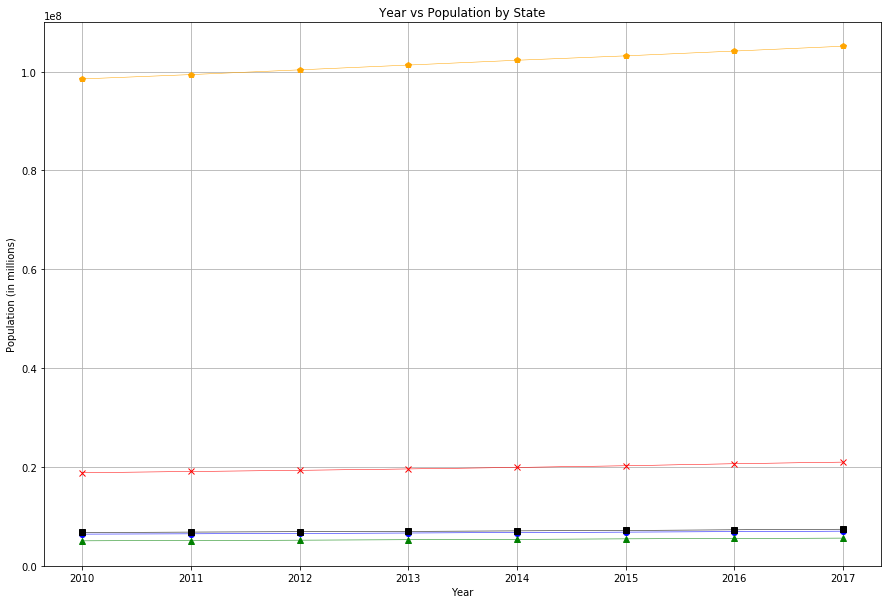

In [11]:
# POPULATION VS YEAR BY STATE
plt.figure(figsize = (15,10))

arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Population']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Population']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Population']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Population']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Population']

plt.ylim(0,110000000)

plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5,marker="p",c='orange')

plt.title("Year vs Population by State")
plt.xlabel("Year")
plt.ylabel("Population (in millions)")

plt.plot()

plt.grid()

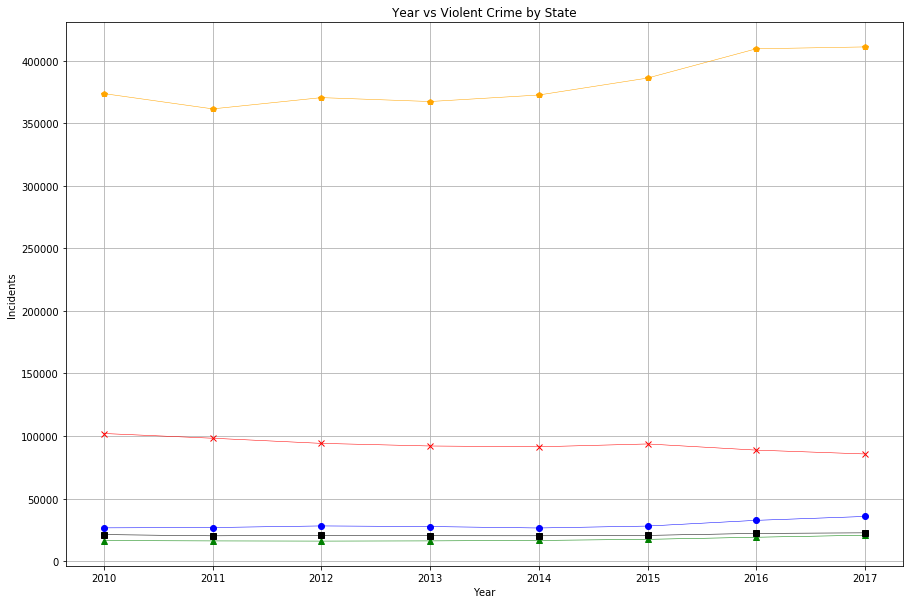

In [12]:
# VIOLENT CRIME VS YEAR BY STATE
plt.figure(figsize = (15,10))

arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Violent Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Violent Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Violent Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Violent Crime']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Violent Crime']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Year vs Violent Crime by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

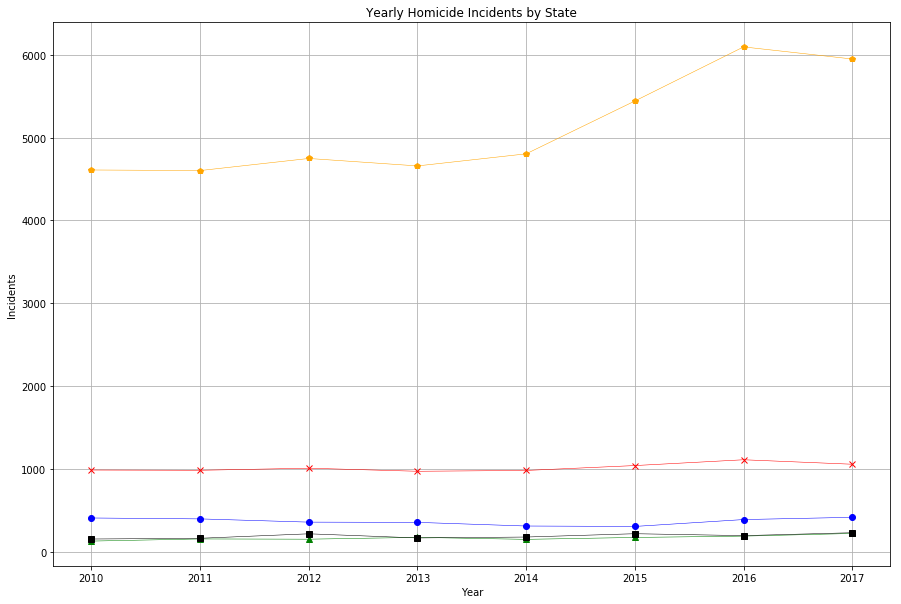

In [13]:
# HOMICIDE VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Homicide']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Homicide']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Homicide']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Homicide']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Homicide']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Homicide Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

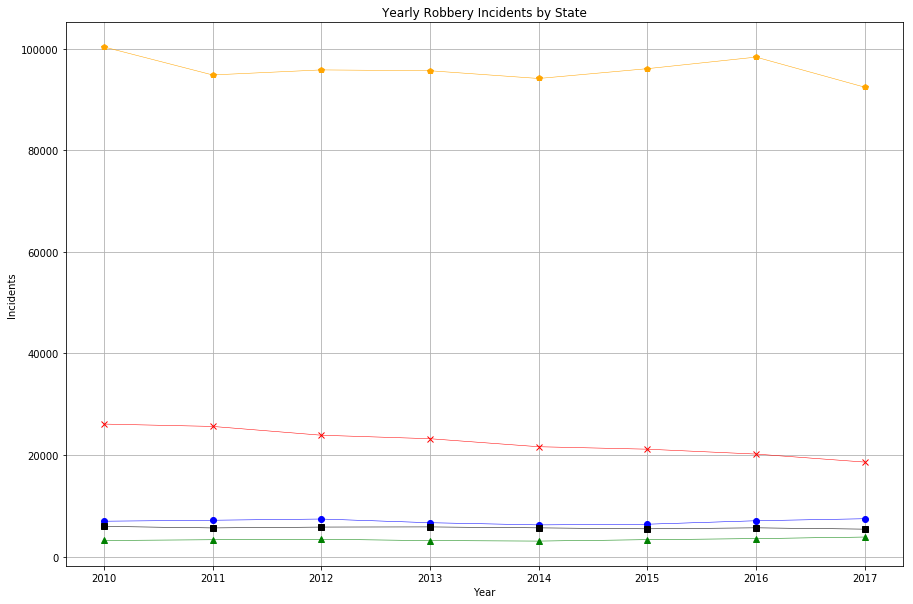

In [14]:
# ROBERY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Robbery']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Robbery']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Robbery']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Robbery']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Robbery']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Robbery Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

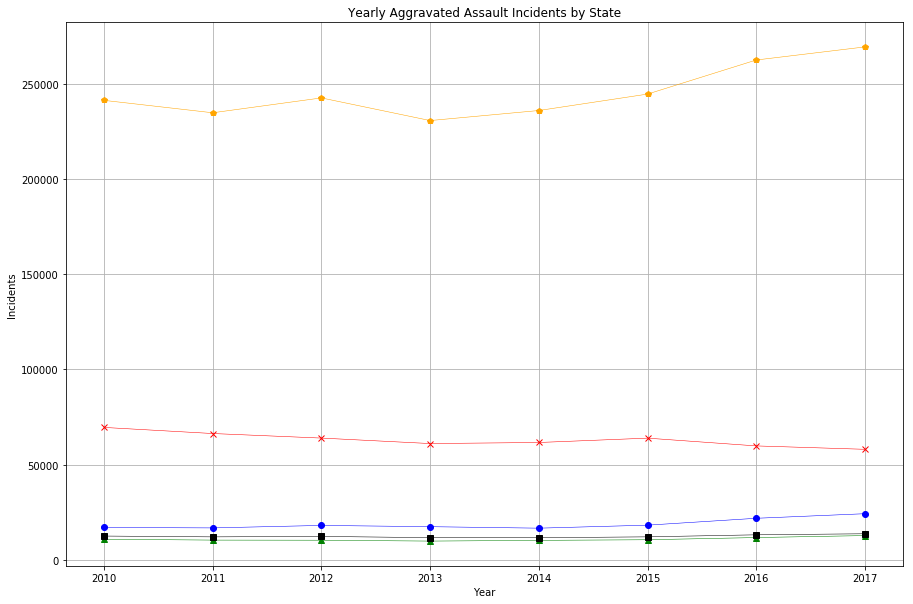

In [15]:
# AGGRAVATED ASSAULT VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Aggravated Assault']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Aggravated Assault']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Aggravated Assault']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Aggravated Assault']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Aggravated Assault']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Aggravated Assault Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

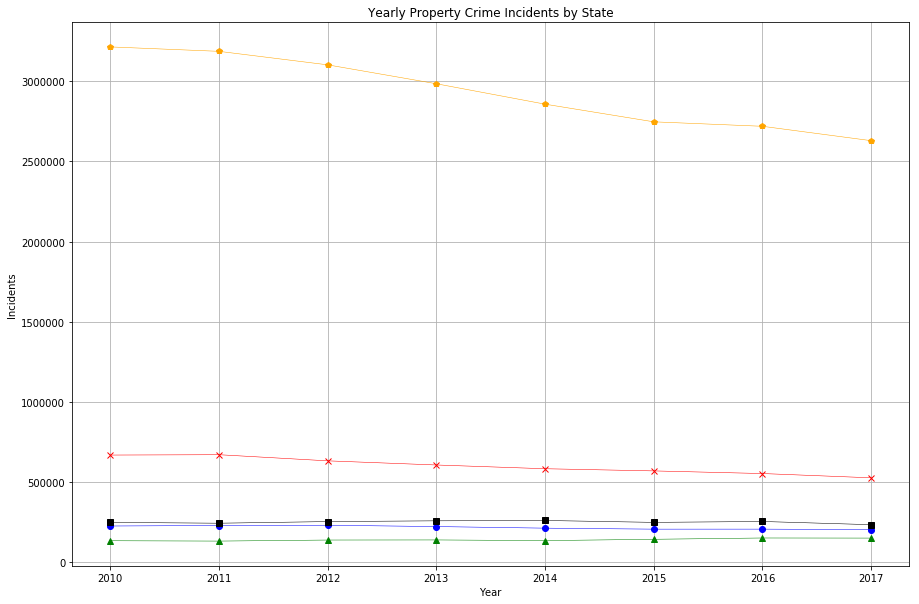

In [16]:
# PROPERTY CRIME VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Property Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Property Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Property Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Property Crime']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Property Crime']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Property Crime Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

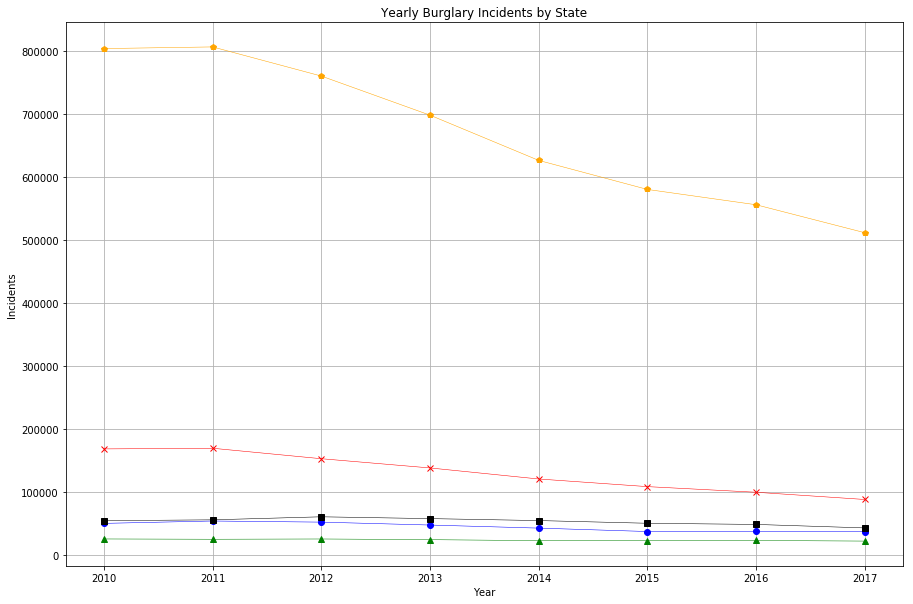

In [17]:
# BURGLARY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Burglary']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Burglary']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Burglary']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Burglary']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Burglary']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Burglary Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

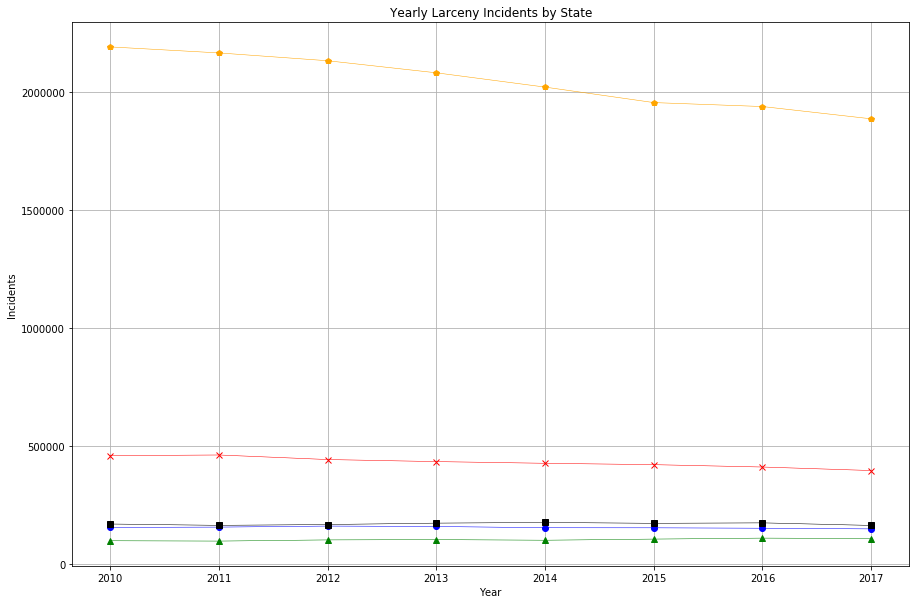

In [18]:
# LARCENY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Larceny']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Larceny']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Larceny']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Larceny']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Larceny']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Larceny Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

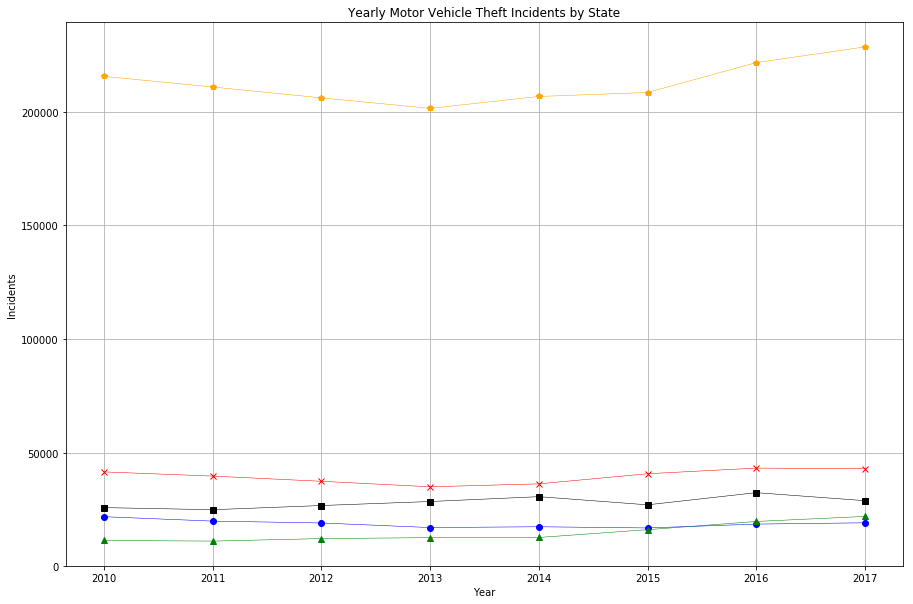

In [19]:
# MOTOR VEHICLE THEFT VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Motor Vehicle Theft']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Motor Vehicle Theft']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Motor Vehicle Theft']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Motor Vehicle Theft']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Motor Vehicle Theft']



plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Motor Vehicle Theft Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

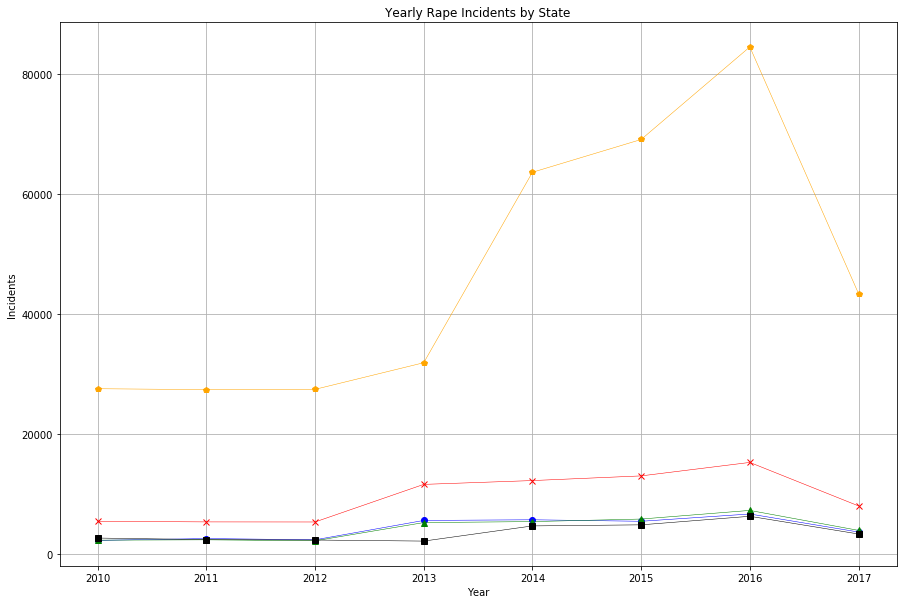

In [20]:
# RAPE VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = state_crime.loc[state_crime['State Name'] == 'Arizona']
colorado_crime = state_crime.loc[state_crime['State Name'] == 'Colorado']
florida_crime = state_crime.loc[state_crime['State Name'] == 'Florida']
washington_crime = state_crime.loc[state_crime['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Rape']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Rape']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Rape']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Rape']
nomj_x_axis = non_mj_sums['Year']
nomj_y_axis = non_mj_sums['Rape']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange")

plt.title("Yearly Rape Incidents by State")
plt.xlabel("Year")
plt.ylabel("Incidents")

plt.plot()

plt.grid()

In [21]:


## The start of the average of averages section. This is comparing the growth rates of each state to the non

# marijuana states









In [22]:
# create dataframe for averages
average_nons = non_mj[['Year', 'State Name']]
key_list = non_mj.keys().tolist()
key_list.remove('Year')
key_list.remove('State Name')
key_list.remove('Population')
for idx, key in enumerate(key_list):
    column = non_mj.loc[:,key_list[idx]]/non_mj.loc[:,'Population'] *1000
    average_nons.loc[:,key]=column.values
average_nons.head()  

/Users/ahardy94/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ahardy94/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Year,State Name,Violent Crime,Homicide,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape
61,2010,Alabama,3.837296,0.057466,1.016425,2.480252,35.279802,8.877835,24.149282,2.252685,0.283153
62,2011,Alabama,4.198024,0.062244,1.021298,2.829284,36.053958,10.641613,23.192800,2.219544,0.285197
63,2012,Alabama,4.502932,0.070991,1.042028,3.120895,35.054908,9.855885,23.149424,2.049599,0.269018
64,2013,Alabama,4.309892,0.071576,0.960903,2.852299,33.478513,8.773280,22.520085,2.185149,0.724866
65,2014,Alabama,4.276773,0.056949,0.970202,2.835913,31.794043,8.196375,21.505192,2.092476,0.707740


In [23]:
# average of averages
no_mj_states_groupby_year=average_nons.groupby("Year")
non_mj_avg=no_mj_states_groupby_year.mean()
# per 1000 people
non_mj_avg = non_mj_avg.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')


In [24]:
# create dataframe for averages
average_janes = state_crime[['Year', 'State Name']]
key_list = state_crime.keys().tolist()
key_list.remove('Year')
key_list.remove('State Name')
key_list.remove('Population')
for idx, key in enumerate(key_list):
    column = state_crime.loc[:,key_list[idx]]/state_crime.loc[:,'Population'] * 1000
    average_janes.loc[:,key]=column.values
average_janes.head()

,Year,State Name,Violent Crime,Homicide,Rape Legacy,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny,Motor Vehicle Theft,Rape
107,2010,Arizona,4.136496,0.063619,0.341641,1.084177,2.647058,35.365104,7.941797,24.034493,3.388814,0.341641
108,2011,Arizona,4.142214,0.061386,0.386405,1.104786,2.589637,35.547364,8.457142,24.028519,3.061703,0.386405
109,2012,Arizona,4.285813,0.054647,0.348336,1.126978,2.755852,35.367994,8.076598,24.393889,2.897507,0.348336
110,2013,Arizona,4.156144,0.053504,0.353278,1.003165,2.621101,33.653972,7.278376,23.818549,2.557047,0.831651
111,2014,Arizona,3.926713,0.046219,0.350138,0.925130,2.469094,31.715393,6.451687,22.691027,2.572679,0.836407


In [25]:
# Graphs for incidents per 1000 people.



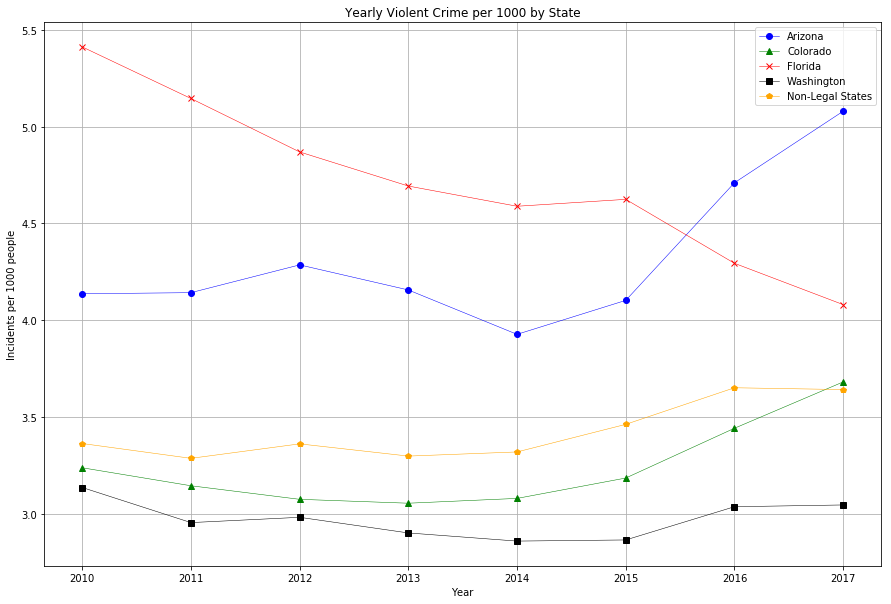

In [26]:
# Violent Crime VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Violent Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Violent Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Violent Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Violent Crime']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Violent Crime']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Violent Crime per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/ViolentCrimePER1000.png")

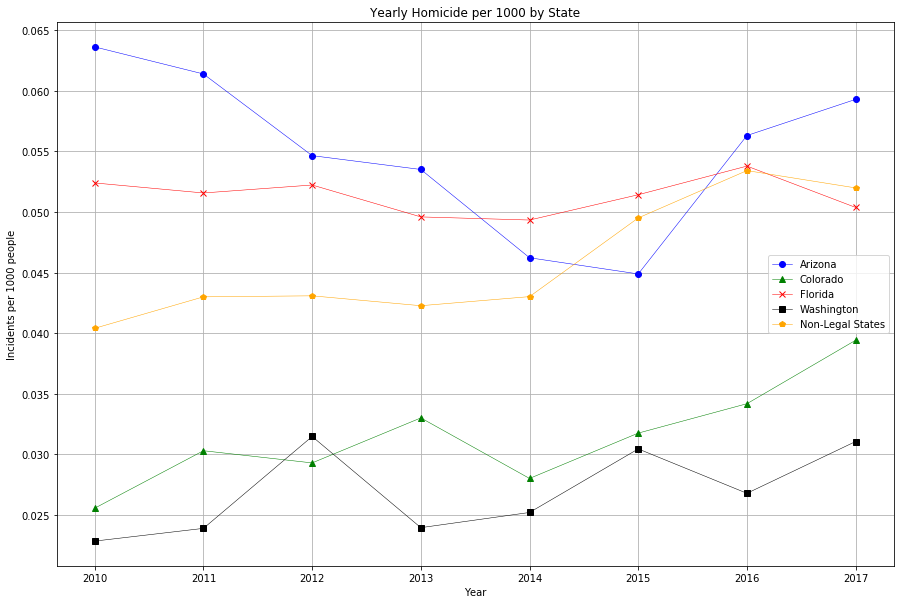

In [27]:
# HOMICIDE VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Homicide']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Homicide']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Homicide']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Homicide']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Homicide']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Homicide per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/HomicidePER1000.png")

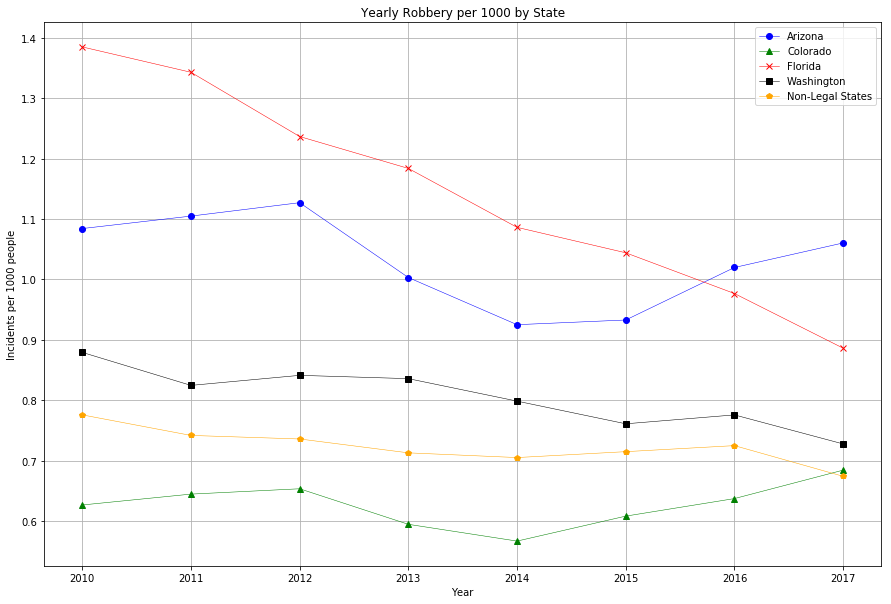

In [28]:
# ROBBERY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Robbery']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Robbery']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Robbery']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Robbery']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Robbery']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Robbery per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")



plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/RobberyPER1000.png")

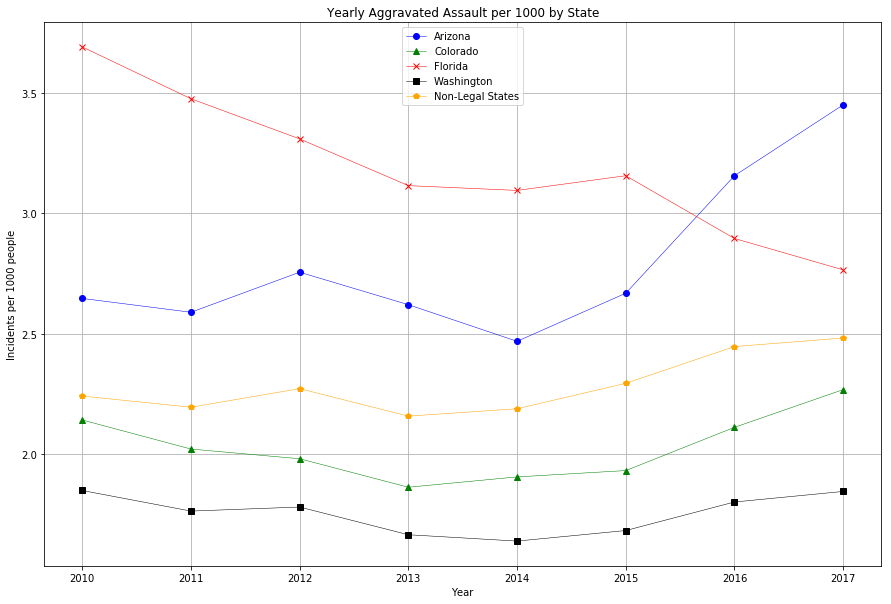

In [29]:
# AGGREVATED ASSAULT VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Aggravated Assault']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Aggravated Assault']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Aggravated Assault']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Aggravated Assault']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Aggravated Assault']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Aggravated Assault per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/AggAssaultPER1000.png")

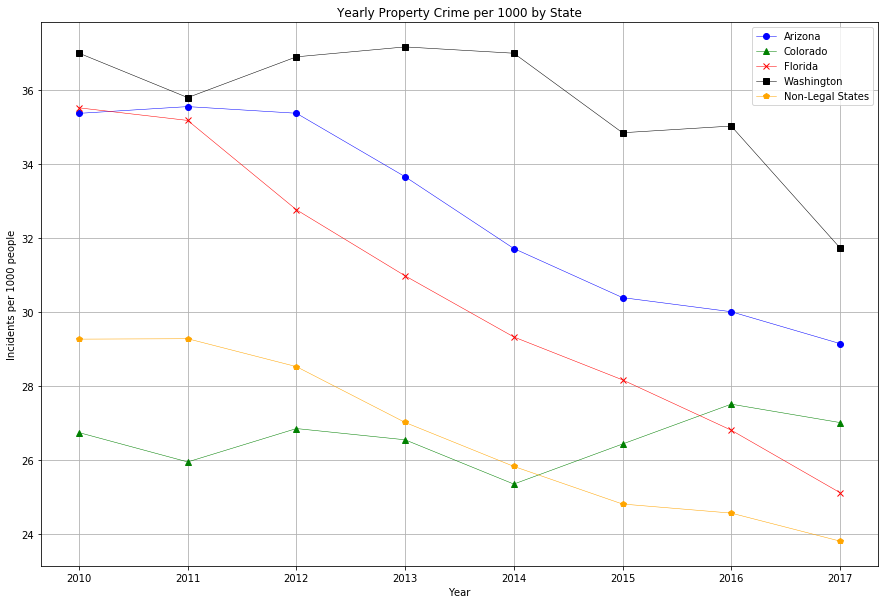

In [30]:
# Property Crime VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Property Crime']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Property Crime']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Property Crime']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Property Crime']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Property Crime']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Property Crime per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/PropertyCrimePER1000.png")

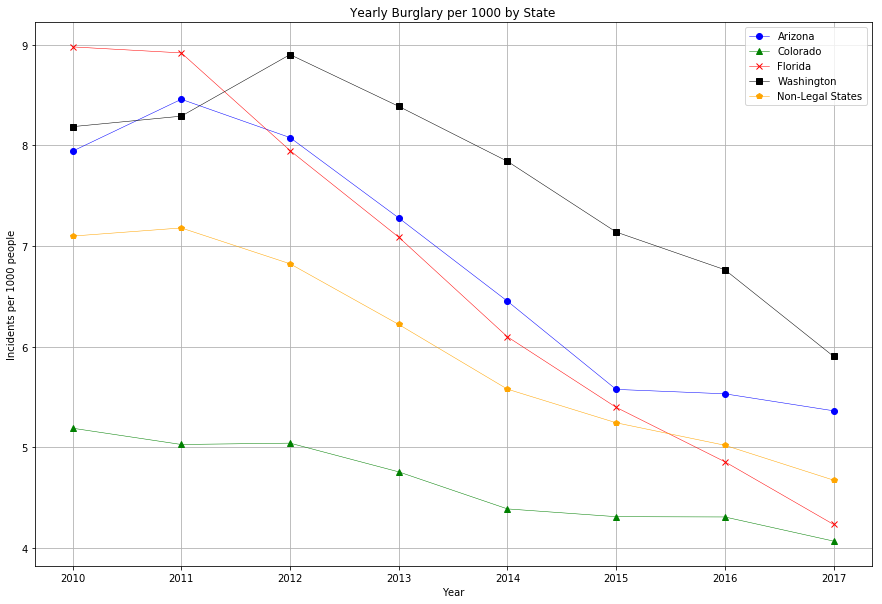

In [31]:
# BURGLARY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Burglary']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Burglary']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Burglary']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Burglary']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Burglary']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Burglary per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/BurglaryPER1000.png")

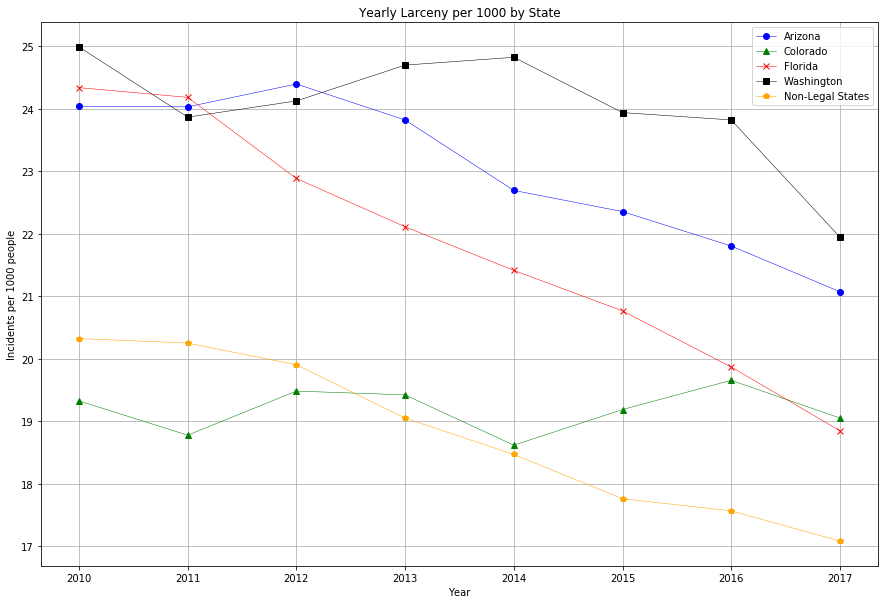

In [32]:
# LARCENY VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Larceny']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Larceny']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Larceny']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Larceny']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Larceny']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Larceny per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/LarcenyPER1000.png")

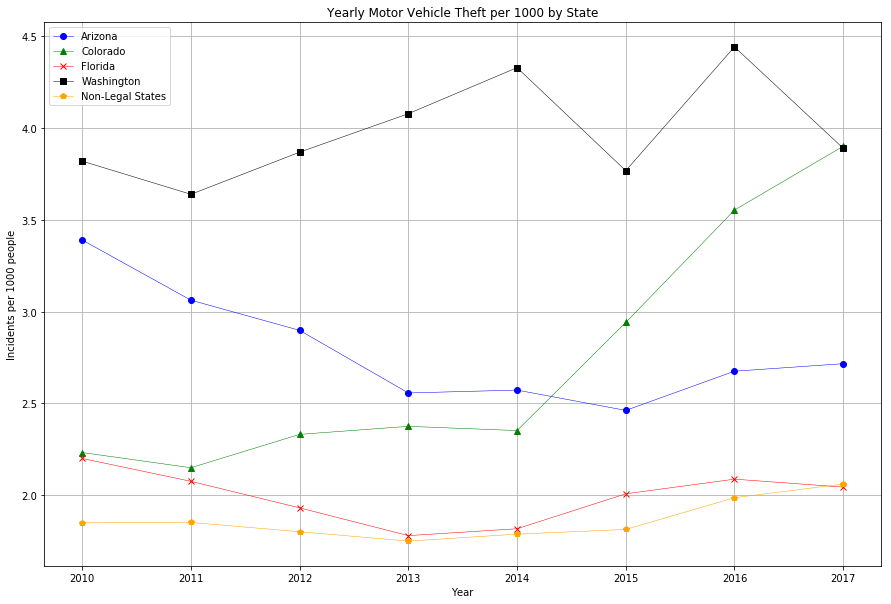

In [33]:
# MOTOR VEHICLE THEFT VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Motor Vehicle Theft']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Motor Vehicle Theft']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Motor Vehicle Theft']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Motor Vehicle Theft']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Motor Vehicle Theft']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Motor Vehicle Theft per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/MotorVehicleTheftPER1000.png")

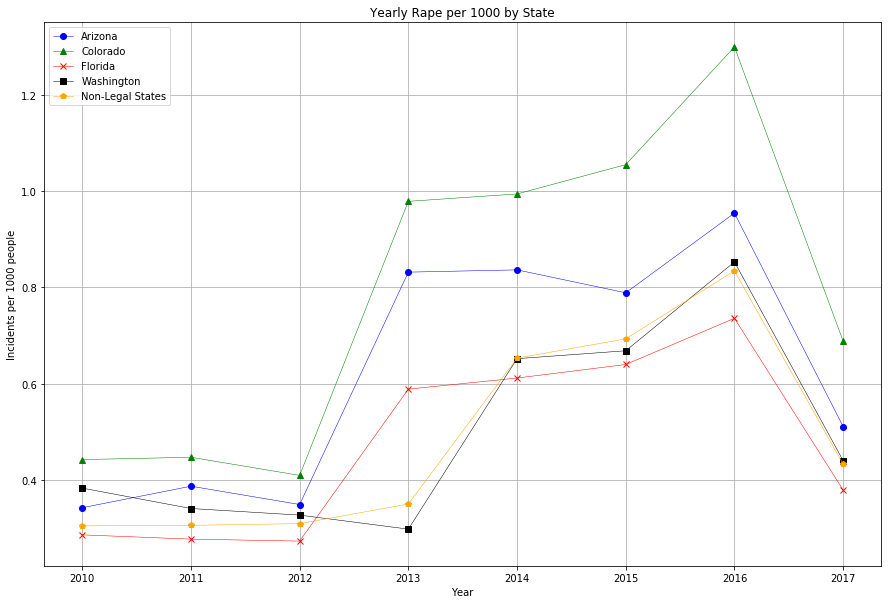

In [34]:
# RAPE VS YEAR BY STATE
plt.figure(figsize = (15,10))


arizona_crime = average_janes.loc[average_janes['State Name'] == 'Arizona']
colorado_crime = average_janes.loc[average_janes['State Name'] == 'Colorado']
florida_crime = average_janes.loc[average_janes['State Name'] == 'Florida']
washington_crime = average_janes.loc[average_janes['State Name'] == 'Washington']

# Axes values
ar_x_axis = arizona_crime['Year']
ar_y_axis = arizona_crime['Rape']
co_x_axis = colorado_crime['Year']
co_y_axis = colorado_crime['Rape']
fl_x_axis = florida_crime['Year']
fl_y_axis = florida_crime['Rape']
wa_x_axis = washington_crime['Year']
wa_y_axis = washington_crime['Rape']
nomj_x_axis = non_mj_avg['Year']
nomj_y_axis = non_mj_avg['Rape']


plt.plot(ar_x_axis, ar_y_axis, linewidth=0.5,marker="o",c='blue', label='Arizona')
plt.plot(co_x_axis, co_y_axis, linewidth=0.5,marker="^",c='green', label='Colorado')
plt.plot(fl_x_axis, fl_y_axis, linewidth=0.5,marker="x",c='red', label='Florida')
plt.plot(wa_x_axis, wa_y_axis, linewidth=0.5,marker="s",c='black', label='Washington')
plt.plot(nomj_x_axis, nomj_y_axis, linewidth=0.5, marker="p", c="orange", label='Non-Legal States')
plt.legend()

plt.title("Yearly Rape per 1000 by State")
plt.xlabel("Year")
plt.ylabel("Incidents per 1000 people")

plt.plot()

plt.grid()
plt.savefig("Crime_Graphs/RapePER1000.png")